In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Mount the google colab
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Colab Notebooks/Applied Machine Learning/Linear Regression/data.csv"
data = pd.read_csv(file_path, header = None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def scale(d):
    mean=d.mean()
    sd=d.std()

    return (d-mean)/sd

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    # The examples are read at random, in no particular order
    np.random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(
            indices[i: min(i + batch_size, num_examples)])

        yield features[batch_indices], labels[batch_indices]

In [ ]:
# Get features and Labels with scaling in place
features = scale(
    np.reshape(np.array(data.iloc[:, 0]), (len(data), 1))
    )
labels = scale(
    np.reshape(np.array(data.iloc[:, 1]), (len(data), 1))
    )

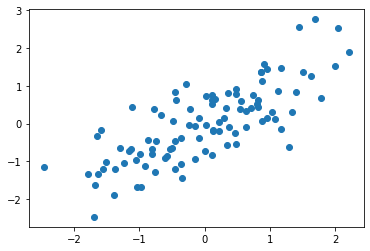

In [ ]:
# Plot the data for Exploration
plt.scatter(features, labels)
plt.show()

In [ ]:
class LinearRegression:
    def __init__(self, X, y, W, b):
        self.X = X
        self.y = y
        self.W = W
        self.b = b
        self.y_pred = self.LinearModel()

    def LinearModel(self):
        return np.dot(self.X, self.W) + self.b

    def mse_loss(self, y, y_pred):
        return np.mean(sum(np.square(y - y_pred))) / 2

    # Change the value of batch size for batch and stochastic
    def train(self, num_epochs = 10, batch_size = 10):
        # Training
        for epoch in range(num_epochs):
            for X, y in data_iter(batch_size, self.X, self.y):
              y_pred = self.predict(X)

              error = (y - y_pred)
              # Update parameters using their gradient
              grad_W = np.sum(error.T.dot(X))
              grad_b = np.sum((y - y_pred))

              # Set the update rule
              self.W = self.W + (1/batch_size *  lr * grad_W)
              self.b = self.b + (1/batch_size * lr * grad_b)

            y_pred = self.predict(X)
            final_loss = self.mse_loss(y, y_pred) / batch_size
            print(f'epoch {epoch + 1}, loss {float(final_loss):f}')

    def predict(self, X):
        return np.dot(X, self.W) + self.b

In [ ]:
np.random.seed(20)
lr = 0.0001
num_epochs = 50
batch_size = 100

In [ ]:
W = np.random.normal(1, 0.001, size=(1,1))
b = np.zeros(1)
linear_regression_model = LinearRegression(features, labels, W, b)

#train the model
linear_regression_model.train()

epoch 1, loss 0.407339
epoch 2, loss 0.269549
epoch 3, loss 0.227095
epoch 4, loss 0.176195
epoch 5, loss 0.313268
epoch 6, loss 0.350332
epoch 7, loss 0.181222
epoch 8, loss 0.347249
epoch 9, loss 0.110235
epoch 10, loss 0.192477


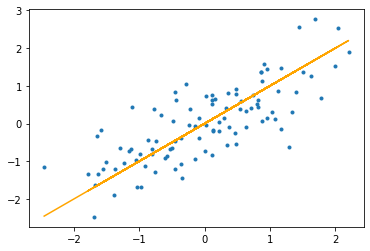

In [ ]:
y_pred = linear_regression_model.predict(features)
plt.scatter(features, labels, marker = '.')
plt.plot(features, y_pred, color = 'orange')
plt.show()

In [ ]:
# The coefficients
print("Coefficients: \n", linear_regression_model.W)

Coefficients: 
 [[0.99862361]]


In [ ]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(labels, y_pred))

Mean squared error: 0.45


In [ ]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(labels, y_pred))

Coefficient of determination: 0.55
